In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
# Combine the data into a single DataFrame
study_data = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23


In [5]:
study_data_reverse = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")
study_data_reverse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Check the number of mice
mouse_count = study_data["Mouse ID"].nunique()
mouse_count

249

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = study_data[study_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
586,g989,0,45.000000,0,Propriva,Female,21,26
587,g989,0,45.000000,0,Propriva,Female,21,26
588,g989,5,48.786801,0,Propriva,Female,21,26
589,g989,5,47.570392,0,Propriva,Female,21,26
590,g989,10,51.745156,0,Propriva,Female,21,26
591,g989,10,49.880528,0,Propriva,Female,21,26
592,g989,15,51.325852,1,Propriva,Female,21,26
593,g989,15,53.442020,0,Propriva,Female,21,26
594,g989,20,55.326122,1,Propriva,Female,21,26
595,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Keep this for now, but likely delete before submitting. Use clean_data 
study_data.drop_duplicates(subset = 'Mouse ID', inplace=True, keep='last')
study_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,a203,45,67.973419,2,Infubinol,Female,20,23
19,a251,45,65.525743,1,Infubinol,Female,21,25
29,a262,45,70.717621,4,Placebo,Female,17,29
39,a275,45,62.999356,3,Ceftamin,Female,20,28
46,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
1852,z435,10,48.710661,0,Propriva,Female,12,26
1862,z578,45,30.638696,0,Ramicane,Male,11,16
1872,z581,45,62.754451,3,Infubinol,Female,24,25
1882,z795,45,65.741070,3,Naftisol,Female,13,29


In [9]:
clean_data = study_data.drop_duplicates(subset = 'Mouse ID', keep='last')
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,a203,45,67.973419,2,Infubinol,Female,20,23
19,a251,45,65.525743,1,Infubinol,Female,21,25
29,a262,45,70.717621,4,Placebo,Female,17,29
39,a275,45,62.999356,3,Ceftamin,Female,20,28
46,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
1852,z435,10,48.710661,0,Propriva,Female,12,26
1862,z578,45,30.638696,0,Ramicane,Male,11,16
1872,z581,45,62.754451,3,Infubinol,Female,24,25
1882,z795,45,65.741070,3,Naftisol,Female,13,29


In [10]:
# Check the number of mice in the clean DataFrame
mouse_count = clean_data["Mouse ID"].nunique()
mouse_count

249

## Summary Statistics

In [11]:
# Show dataframe for reference
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,a203,45,67.973419,2,Infubinol,Female,20,23
19,a251,45,65.525743,1,Infubinol,Female,21,25
29,a262,45,70.717621,4,Placebo,Female,17,29
39,a275,45,62.999356,3,Ceftamin,Female,20,28
46,a366,30,63.440686,1,Stelasyn,Female,16,29


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Assemble the resulting series into a single summary DataFrame.

drug_reg = clean_data["Drug Regimen"].unique().tolist()
drug_reg

['Infubinol',
 'Placebo',
 'Ceftamin',
 'Stelasyn',
 'Zoniferol',
 'Ramicane',
 'Ketapril',
 'Propriva',
 'Naftisol',
 'Capomulin']

In [13]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

mean = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_dev = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = std_dev/np.sqrt(std_dev).count()

drug_group = ({"Mean Tumor Volume": mean,
              "Median Tumor Volume": median,
              "Tumor Volume Variance": var,
              "Tumor Volume Std. Dev.": std_dev,
              "Tumor Volume Std. Err.": sem})
drug_group_df = pd.DataFrame(drug_group)
drug_group_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,0.571519
Ceftamin,57.753977,59.851956,69.982735,8.365568,0.836557
Infubinol,58.178246,60.165180,74.010875,8.602957,0.860296
Ketapril,62.806191,64.487812,98.921330,9.945920,0.994592
Naftisol,61.205757,63.283288,106.029927,10.297083,1.029708
Placebo,60.508414,62.030594,78.759797,8.874672,0.887467
Propriva,56.736964,55.841410,69.349002,8.327605,0.832760
Ramicane,36.191390,36.561652,32.166354,5.671539,0.567154
Stelasyn,61.001707,62.192350,90.331586,9.504293,0.950429


In [14]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
def sem(x):
    return x.std()/np.sqrt(x.count())

grouped_df = clean_data.groupby("Drug Regimen")
agg_df = grouped_df['Tumor Volume (mm3)'].agg(['mean', 'median', 'std', 'var', sem])

agg_df

,mean,median,std,var,sem
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,5.715188,32.663378,1.143038
Ceftamin,57.753977,59.851956,8.365568,69.982735,1.673114
Infubinol,58.178246,60.165180,8.602957,74.010875,1.720591
Ketapril,62.806191,64.487812,9.945920,98.921330,1.989184
Naftisol,61.205757,63.283288,10.297083,106.029927,2.059417
Placebo,60.508414,62.030594,8.874672,78.759797,1.774934
Propriva,56.736964,55.841410,8.327605,69.349002,1.665521
Ramicane,36.191390,36.561652,5.671539,32.166354,1.134308
Stelasyn,61.001707,62.192350,9.504293,90.331586,1.940056


In [15]:
# Show clean_data for reference
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,a203,45,67.973419,2,Infubinol,Female,20,23
19,a251,45,65.525743,1,Infubinol,Female,21,25
29,a262,45,70.717621,4,Placebo,Female,17,29
39,a275,45,62.999356,3,Ceftamin,Female,20,28
46,a366,30,63.440686,1,Stelasyn,Female,16,29


In [16]:
print(clean_data.dtypes)

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object


In [34]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#timepoints = clean_data[["Timepoint", "Drug Regimen"]]
#timepoints_group = timepoints.groupby("Drug Regimen").value_counts()
#timepoints_group_df = pd.DataFrame(timepoints_group)
#timepoints_group_df
#timepoints
mice_count = clean_data[["Drug Regimen","Timepoint"]]
mice_count = mice_count.set_index("Drug Regimen")
mice_count

KeyError: '[9] not in index'

In [33]:
mice_count.plot(kind='bar', x="Drug Regimen", y="Timepoint")
plt.show()

TypeError: plot() got an unexpected keyword argument 'x'

KeyError: 'Drun Regimen'

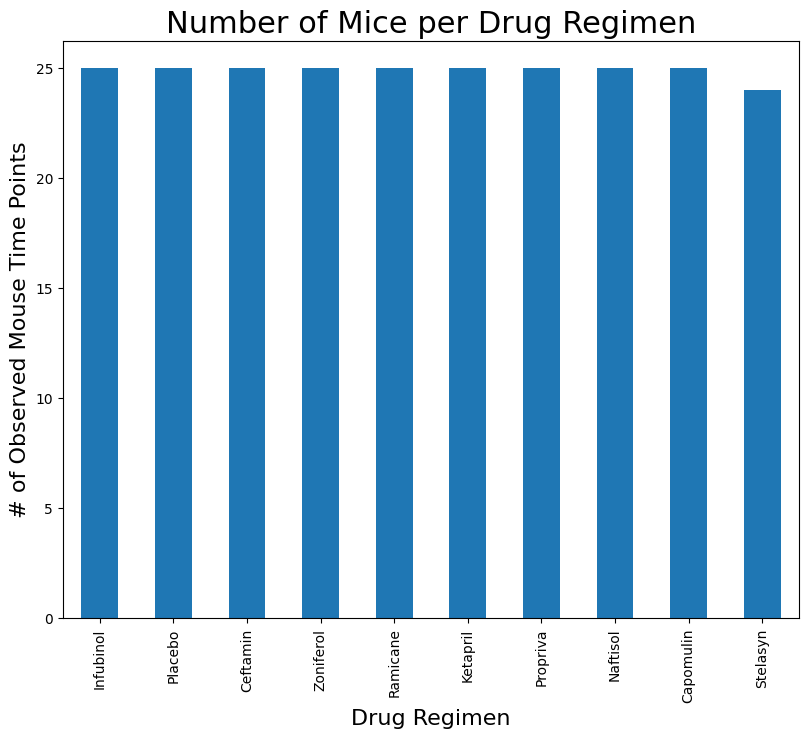

In [32]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mice_count = clean_data["Drug Regimen"].value_counts().plot(kind="bar", figsize=(9.5, 7.5))

mice_count.set_xlabel ("Drug Regimen", size = 16)
mice_count.set_ylabel ("# of Observed Mouse Time Points", size = 16)
plt.title("Number of Mice per Drug Regimen", size = 22)
plt.ylim(0, max(clean_data["Drun Regimen"].value_counts() + 20))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()